# Data Visualization with Haberman Dataset

### Importing the .csv Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
h_man = pd.read_csv("haberman.csv")
h_man.head()
#h_man

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Basic stats of the data set

1. Number of points in the data set
2. Number of features
3. Number of classes
4. Data points per class

In [2]:
#1.
c1=h_man['age'].count()
print("Total # of data points in the set:",c1*4)

#2.
#print("Number of features",h_man.shape[0])
count=h_man.shape[1]
print("Number of features:",count)

#3.
a=len(h_man['status'].unique())
b=h_man['status'].unique()
print("Number of classes:",a)
print("Status values of {} are present in the class label".format(b))
print("\n")
# Reference link: https://cmdlinetips.com/2018/01/how-to-get-unique-values-from-a-column-in-pandas-data-frame/

#4.
print("Number of data points per class are: ")
h_man['status'].value_counts()
#g=h_man.groupby('status')
#g.describe()

Total # of data points in the set: 1224
Number of features: 4
Number of classes: 2
Status values of [1 2] are present in the class label


Number of data points per class are: 


1    225
2     81
Name: status, dtype: int64

### Details of the features:

- Column Age repesents the age of the patients who were subjected to the cancer test.  
- Column year contains data points representing the year in which the tests were carried out.  
- Column nodes contains data points representing the number of positive lymph nodes that are detrimental to determine the severity of the cancer.  
- Column status contains data points 1 & 2 where 1 implies that the patient survived 5 years or longer & 2 implies that the patient died within 5 years.

## Objective

To predict if the patient (post surgery) will survive after 5 years or not based on the patient’s age, year of treatment and the number of positive lymph nodes.

## Statistical analysis

In [3]:
h_man.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Key Observations from Statistical analysis :

Considering the birds eye view of the stats,

1. We can infer that the maximum number of nodes found in a patient turned out to be 52 and each patient on an average had 4        nodes.
2. The mean age of the patients subjected to this test was 52.5 and the age of the patients ranged from 30 being the min value
   to 83 being the max value.
3. It was observed that 75% of the patients who were aged below 60.75 had 4 or less nodes & 25% of the patients who were aged
   below 44 had no nodes at all.

## Univariate analysis

### Histograms

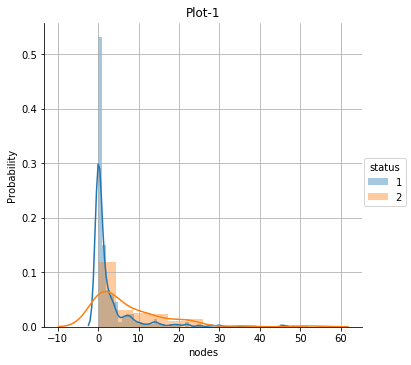

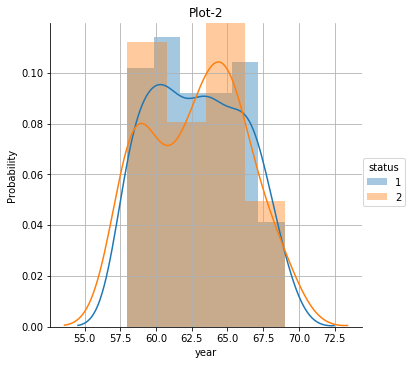

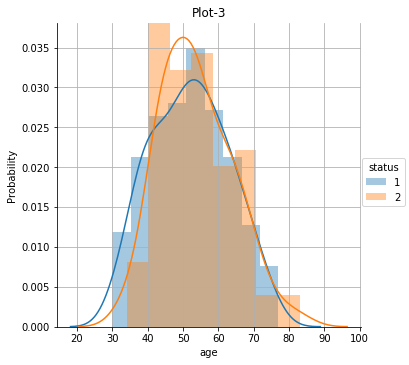

In [4]:
import warnings 
warnings.filterwarnings("ignore")

sns.FacetGrid(h_man, hue="status", size=5) \
   .map(sns.distplot,'nodes') \
   .add_legend()
plt.ylabel('Probability')
plt.title("Plot-1")
plt.grid()
plt.show()

sns.FacetGrid(h_man, hue="status", size=5) \
   .map(sns.distplot,'year') \
   .add_legend()
plt.ylabel('Probability')
plt.title("Plot-2")
plt.grid()
plt.show()

sns.FacetGrid(h_man, hue="status", size=5) \
   .map(sns.distplot,'age') \
   .add_legend()
plt.ylabel('Probability')
plt.title("Plot-3")
plt.grid()
plt.show()

### Grouping the data as survived & dead using status column

In [5]:
survived=h_man[h_man['status']==1]
dead=h_man[h_man['status']==2]

## PDF's & CDF's

### For status 1 i.e. patients who survived after 5 years.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


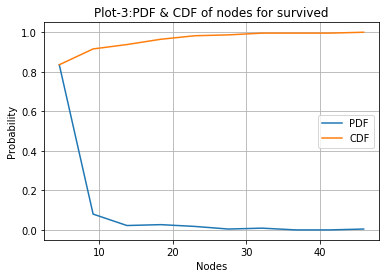

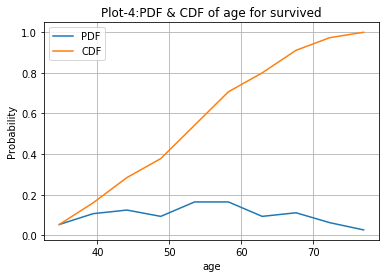

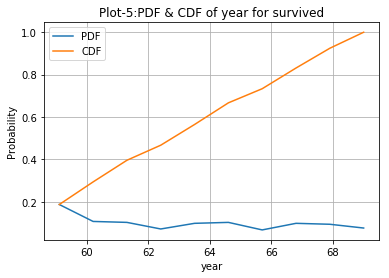

In [6]:


counts, bin_edges = np.histogram(survived['nodes'], bins=10,density = True)
pdf = counts/(sum(counts));
print(pdf)
print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:],cdf,label='CDF')
plt.ylabel('Probability')
plt.xlabel('Nodes')
plt.title('Plot-3:PDF & CDF of nodes for survived')
plt.grid()
plt.legend()
plt.show()

counts, bin_edges = np.histogram(survived['age'], bins=10,density = True)
pdf = counts/(sum(counts));
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:],cdf,label='CDF')
plt.ylabel('Probability')
plt.xlabel('age')
plt.title('Plot-4:PDF & CDF of age for survived')
plt.grid()
plt.legend()
plt.show()


counts, bin_edges = np.histogram(survived['year'], bins=10,density = True)
pdf = counts/(sum(counts));
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:],cdf,label='CDF')
plt.ylabel('Probability')
plt.xlabel('year')
plt.title('Plot-5:PDF & CDF of year for survived')
plt.grid()
plt.legend()
plt.show()

### For status 2 i.e. patients who died within 5 years.

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


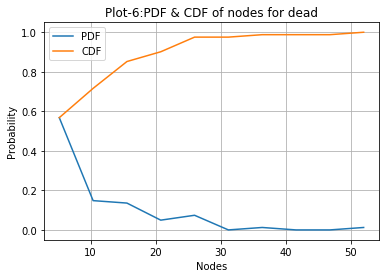

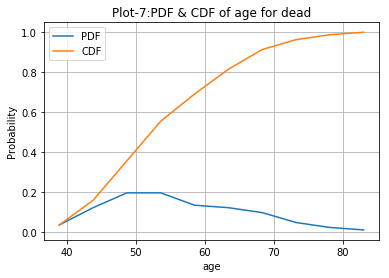

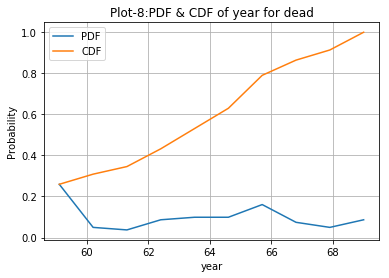

In [7]:
counts, bin_edges = np.histogram(dead['nodes'], bins=10,density = True)
pdf = counts/(sum(counts));
print(pdf)
print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:],cdf,label='CDF')
plt.ylabel('Probability')
plt.xlabel('Nodes')
plt.title('Plot-6:PDF & CDF of nodes for dead')
plt.grid()
plt.legend()
plt.show()

counts, bin_edges = np.histogram(dead['age'], bins=10,density = True)
pdf = counts/(sum(counts));
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:],cdf,label='CDF')
plt.ylabel('Probability')
plt.xlabel('age')
plt.title('Plot-7:PDF & CDF of age for dead')
plt.grid()
plt.legend()
plt.show()


counts, bin_edges = np.histogram(dead['year'], bins=10,density = True)
pdf = counts/(sum(counts));
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:],cdf,label='CDF')
plt.ylabel('Probability')
plt.xlabel('year')
plt.title('Plot-8:PDF & CDF of year for dead')
plt.grid()
plt.legend()
plt.show()

## Box plots

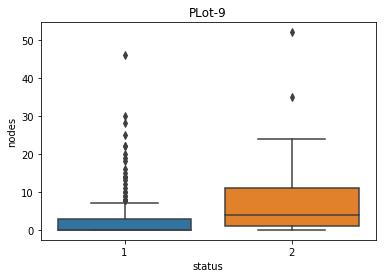

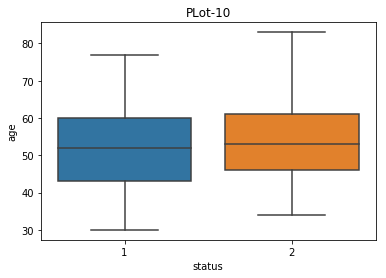

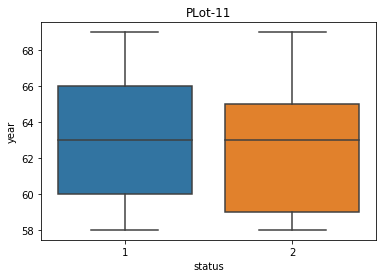

In [8]:
sns.boxplot(x='status',y='nodes', data=h_man)
plt.title("PLot-9")
plt.show()
sns.boxplot(x='status',y='age', data=h_man)
plt.title("PLot-10")
plt.show()
sns.boxplot(x='status',y='year', data=h_man)
plt.title("PLot-11")
plt.show()

## Violin plots

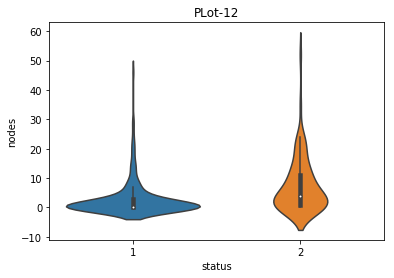

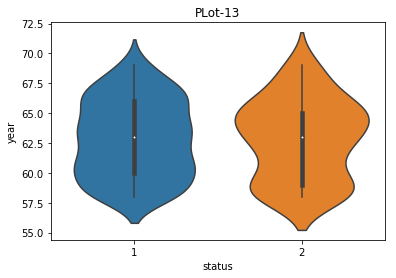

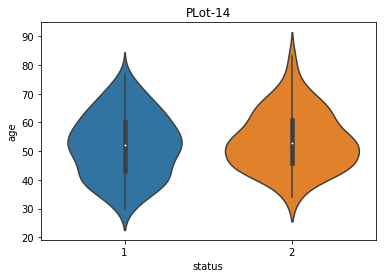

In [9]:
sns.violinplot(x='status',y='nodes', data=h_man)
plt.title("PLot-12")
plt.show()
sns.violinplot(x='status',y='year', data=h_man)
plt.title("PLot-13")
plt.show()
sns.violinplot(x='status',y='age', data=h_man)
plt.title("PLot-14")
plt.show()

### Observations from Univariate analysis:

1. From Plot-1, it can be observed that the number of nodes in survivors were dense in the range of 0 to 5 compared 
   to other ranges. So, if a patient has a node number <5 then the chances of survival is high.
2. Also from Plot -1, it can be observed that the patient has no chance of surviving whatsoever if he/she possesses nodes more
   than 10.
3. I did not find Plots 2 & 3 useful for any sort of analysis/conclusions as there was significant overlap of data points.
4. From Plot-3 & PLot-6, it can be observed that almost 83% of the survivors had nodes below 4 and from plot-6 almost 58% of the
   dead had the same number of nodes as for survivors but the maximum age of patients who survived were 32 and the dead were 38.
   (Refer plots-4 & 7).
5. From plot-9 & 12, it can be observed that the patients possessing more than 5 nodes had a very little chance of survival.
6. From plot-10 &14, it can be observed that the patients with age below 44 had a higher chance of survival compared to the rest
   of the patients.
7. From plot-11 & 13 , the patients treated before 1959 had less chances of surviving for more than 5 years compared to the 
   others & patients treated after 1965 had higher chances of surviving for more than 5 years with a margin of error=18% .

## 2D scatter plots

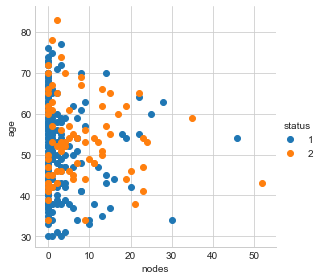

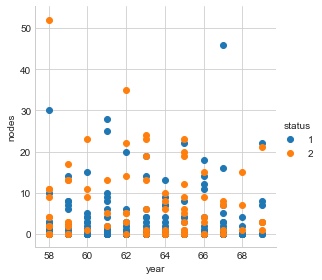

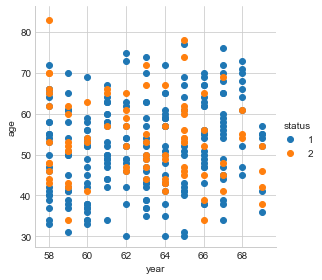

In [10]:
sns.set_style("whitegrid");
sns.FacetGrid(h_man, hue="status", size=4) \
    .map(plt.scatter, "nodes", "age") \
    .add_legend();
plt.show();

sns.set_style("whitegrid");
sns.FacetGrid(h_man, hue="status", size=4) \
    .map(plt.scatter, "year", "nodes") \
    .add_legend();
plt.show();

sns.set_style("whitegrid");
sns.FacetGrid(h_man, hue="status", size=4) \
    .map(plt.scatter, "year", "age") \
    .add_legend();
plt.show();

## Pair Plots

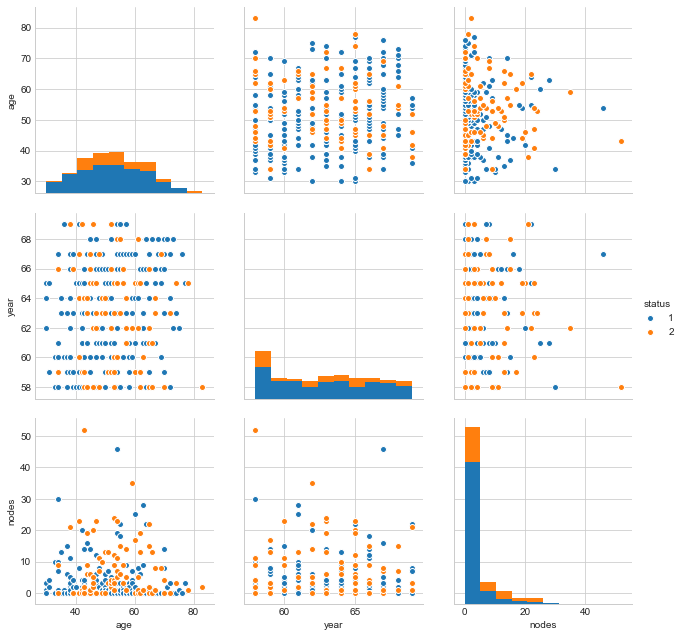

In [12]:
sns.set_style("whitegrid");
sns.pairplot(h_man, hue="status", vars=["age","year","nodes"],size=3);
plt.show()

## Observations on Bi-variate analysis:

1. From the scatter & pair plots of nodes(along Y axis) and years(along x axis), the data points can be separated linearly into
   the two classes compared to the other plots.
2. When a straight line is drawn passing through the origin in the nodes vs years scatter plot then any query point(i.e. a          patient's node & year of treatement) falling below the line will indicate that he/she will survive longer than than the ones    who are above the line.

## Final conclusion:

The univariate analysis provided better quantitative results and satisfactory conclusions as compared to the Bi-variate analysis. We need more features so that the Bi-variate analysis is more effective. 
In sum, the key take aways from the univariate analysis was that patients having node number less than 5 had higher chances of
survival compared to the others and the patients who were treated after 1965 had higher chances of survival compared to the
ones before that year. Maybe the advent of technology post 1959 would have contributed to a higher survival rate.